# 남이 만든 CNN! (pretrained CNN)

## 쉽지만 중요한 코너!

이미 **'잘 만들어진'** 모델들을 가져다가 사용해보자.

[이 링크를 참고해보자](https://keras.io/applications/)


---

### 라이브러리 로딩

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.inception_v3 import decode_predictions

from tensorflow.keras.preprocessing import image

import numpy as np
import matplotlib.pyplot as plt

## 인셉션 모델 바로 가져오기!

[이 코드](https://github.com/fchollet/deep-learning-models/blob/master/inception_v3.py)를 참고하는 것도 도움이 된다!




In [ ]:
model = InceptionV3(weights='imagenet', # 이미지넷 데이터 바탕으로 미리 학습된 것, 이건 건들지마
                    include_top=True,   # 마지막 레이어까지 전부
                    input_shape= (299,299,3))

96112376/96112376 [==============================] - 5s 0us/step


In [ ]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [ ]:
from tensorflow.keras.utils import plot_model

In [ ]:
plot_model(model, show_shapes = True, show_layer_names=True)
# 콘캐이트네이트로 끊고 이것이 바로 인셉션 모델의 특징...

Output hidden; open in https://colab.research.google.com to view.

엇, 마지막 prediction 레이어를 보면 노드가 1000개!

분류 가능한 이미지가 1000개라는 뜻!

[구경하러 가자](http://image-net.org/challenges/LSVRC/2014/browse-synsets)

### 내 그림 파일을 업로드 해둔 곳으로 가자!

**경로에 대하여**
1. my_data 폴더를 **본인의** 구글 드라이브에 바로 만들어둔다.
2. my_data 폴더 안에 img1 폴더를 만든다.
3. 구글링하여 이미지 파일들을 수집하고 img1 이라는 폴더안에 업로드한다.
4. 5초 정도 여유를 갖자.
5. 아래 코드들을 실행한다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls

drive/  sample_data/


In [ ]:
cd /content/drive/MyDrive/my_data

/content/drive/MyDrive/my_data


In [ ]:
ls

my_mnist/


In [12]:
mkdir /content/drive/MyDrive/my_data/img1/

In [13]:
ls

img1/  model.png  my_mnist/


### 이미지를 불러와보자

In [14]:
import glob

In [16]:
files = glob.glob('/content/drive/MyDrive/my_data/img1/*')
files

['/content/drive/MyDrive/my_data/img1/woman.jpg',
 '/content/drive/MyDrive/my_data/img1/glasses.jpg',
 '/content/drive/MyDrive/my_data/img1/oldtimer.jpg',
 '/content/drive/MyDrive/my_data/img1/shoes.jpg',
 '/content/drive/MyDrive/my_data/img1/tree.jpg',
 '/content/drive/MyDrive/my_data/img1/mountains.jpg',
 '/content/drive/MyDrive/my_data/img1/cat.jpg',
 '/content/drive/MyDrive/my_data/img1/flowers.jpg',
 '/content/drive/MyDrive/my_data/img1/snail.jpg',
 '/content/drive/MyDrive/my_data/img1/squirrel.jpg']

preprocess 전, 최대값: 255.0, 최소값: 0.0
preprocess 후, 최대값: 1.0, 최소값: -1.0
35363/35363 [==============================] - 0s 0us/step
[[('n02356798', 'fox_squirrel', 0.88322616), ('n02361337', 'marmot', 0.0044542295), ('n02326432', 'hare', 0.0022617476)]]


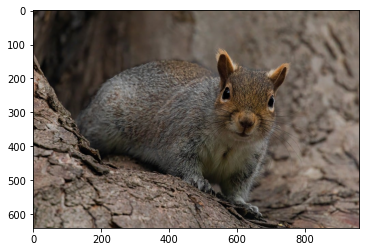

In [17]:
img = image.load_img(files[-1], color_mode='rgb', target_size = (299,299) ) # 마지막 파일에 대해서만 가져옴
img = image.img_to_array(img) # 배열화
img = img.reshape((-1,299,299,3)) 
print(f'preprocess 전, 최대값: {np.max(img)}, 최소값: {np.min(img)}') 

img = preprocess_input(img) # 프리프로세싱 지원
print(f'preprocess 후, 최대값: {np.max(img)}, 최소값: {np.min(img)}') 

features = model.predict(img) # 이미지를 예측한 걸 퓨처에 넣어준다 
print(decode_predictions(features, top=3)) # 어레이값을 다시 예측값으로 바꿔주는? 확률 높은 순서대로 나열한 것 top 디폴트는 5

plt.imshow(image.load_img(files[-1]))
plt.show()

### 이미지가 여러 장이라면

In [18]:
images = []

for path in files :
    img = image.load_img(path, grayscale = False, target_size = (299,299) ) # grayscale False 는 컬러 이미지 말하는거임
    img = image.img_to_array(img)
    img = preprocess_input(img)
    images.append(img)
    
images = np.array(images)    

1/1 [==============================] - 1s 1s/step
[('n02906734', 'broom', 0.51739305), ('n04259630', 'sombrero', 0.47309884), ('n04599235', 'wool', 0.0016935817)]


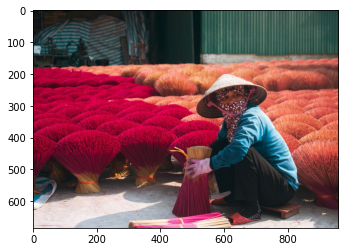

[('n03871628', 'packet', 0.08881269), ('n07248320', 'book_jacket', 0.082281), ('n03485794', 'handkerchief', 0.06257686)]


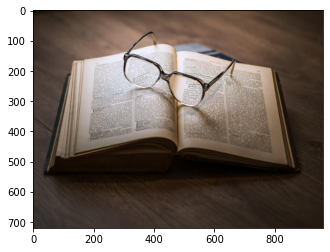

[('n03100240', 'convertible', 0.94998145), ('n03459775', 'grille', 0.004141236), ('n04285008', 'sports_car', 0.0026416471)]


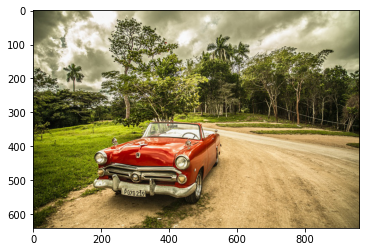

[('n03584829', 'iron', 0.6887554), ('n03388183', 'fountain_pen', 0.07248277), ('n04120489', 'running_shoe', 0.03173252)]


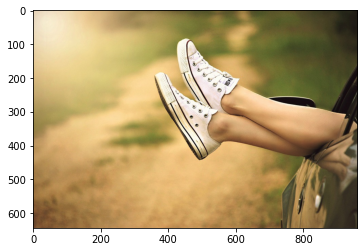

[('n09332890', 'lakeside', 0.48996606), ('n03388043', 'fountain', 0.10687839), ('n04286575', 'spotlight', 0.03357982)]


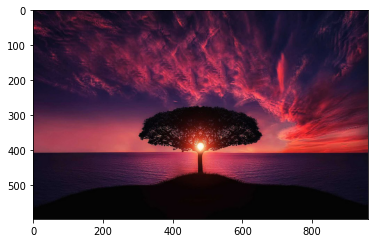

[('n09193705', 'alp', 0.6552531), ('n09468604', 'valley', 0.15548627), ('n09472597', 'volcano', 0.0761845)]


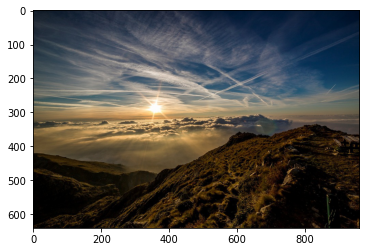

[('n02123159', 'tiger_cat', 0.58751106), ('n02124075', 'Egyptian_cat', 0.1676897), ('n02123045', 'tabby', 0.10383793)]


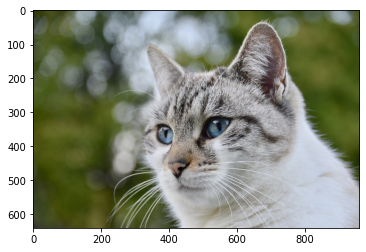

[('n02279972', 'monarch', 0.16203772), ('n02281406', 'sulphur_butterfly', 0.11831084), ('n02281787', 'lycaenid', 0.114368446)]


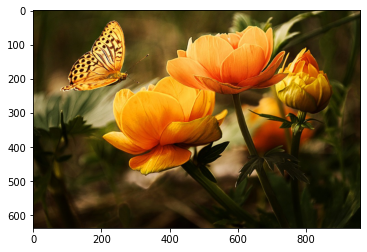

[('n01944390', 'snail', 0.9677453), ('n01945685', 'slug', 0.007478031), ('n01770081', 'harvestman', 0.0008253105)]


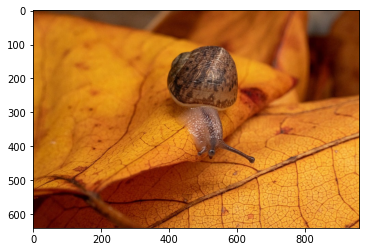

[('n02356798', 'fox_squirrel', 0.8832305), ('n02361337', 'marmot', 0.0044544553), ('n02326432', 'hare', 0.0022617977)]


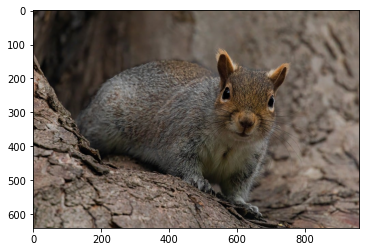

In [19]:
features = model.predict(images)
predictions = decode_predictions(features, top=3)

for i in range(images.shape[0]) :
    print(predictions[i])
    plt.imshow(image.load_img(files[i]))
    plt.show()

## 매우매우 너무너무 중요한 Exercise!

* 강아지로 한다. (싫으면 다른거 하나 정하자.)
* 잘 되는 강아지 이미지 10 개 찾아보자.
* 안 되는 강아지 이미지 10 개 찾아보자.
---
- 경로 설정
    - my_data 폴더 안에 img2를 만들고 수집한 이미지를 넣으세요.

- 왜 이게 중요하냐면, dog에서도 dog의 세부품종까지 있고
- 잘되는 강아지 10개와 안되는 강아지 10개를 봤을 때 이미지 분류의 한계를 알 수 있을 듯?
- 잘 되는 강아지의 특징이 뭐가 있을까? 
    - 뚜렷하다
    - 명확하다
    - 강아지만 있다.
    - 경계가 잘 구분되어 있다
- 안 되는 강아지의 특징
    - 뒷모습
    - 배경과 겹친다거나
    - 여러마리
    - 강아지가 나온 건지, 장난감이 나온 건지 모호할 때

In [20]:
ls

img1/  model.png  my_mnist/


In [24]:
mkdir /content/drive/MyDrive/my_data/img2/

In [25]:
ls

img1/  img2/  model.png  my_mnist/


In [26]:
files2 = glob.glob('/content/drive/MyDrive/my_data/img2/*')


In [27]:
images2 = []

for path in files2 :
    img = image.load_img(path, grayscale = False, target_size = (299,299) ) # grayscale False 는 컬러 이미지 말하는거임
    img = image.img_to_array(img)
    img = preprocess_input(img)
    images2.append(img)
    
images2 = np.array(images2)    

1/1 [==============================] - 2s 2s/step
[('n02123045', 'tabby', 0.48710847), ('n02124075', 'Egyptian_cat', 0.22933358), ('n02123159', 'tiger_cat', 0.19329199)]


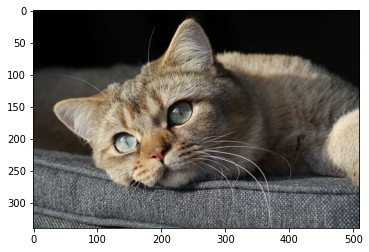

[('n02113978', 'Mexican_hairless', 0.40521458), ('n02107312', 'miniature_pinscher', 0.1481595), ('n02091032', 'Italian_greyhound', 0.13777241)]


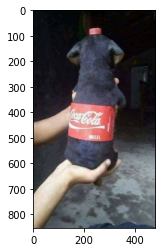

[('n02085936', 'Maltese_dog', 0.27578104), ('n04229816', 'ski_mask', 0.095778905), ('n02113624', 'toy_poodle', 0.06634022)]


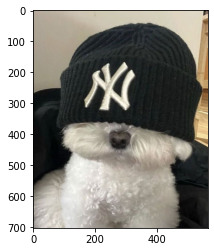

[('n04522168', 'vase', 0.047262456), ('n02443114', 'polecat', 0.04697274), ('n02509815', 'lesser_panda', 0.025589423)]


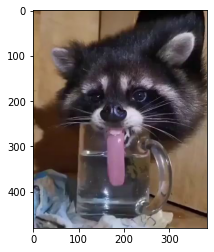

[('n02342885', 'hamster', 0.35891312), ('n02441942', 'weasel', 0.21408068), ('n02442845', 'mink', 0.16663502)]


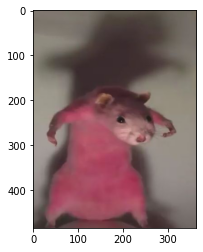

[('n04371430', 'swimming_trunks', 0.1252867), ('n04258138', 'solar_dish', 0.06967296), ('n02641379', 'gar', 0.054022804)]


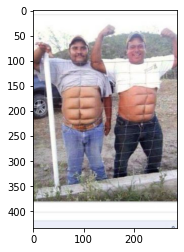

[('n04462240', 'toyshop', 0.13068597), ('n02782093', 'balloon', 0.10863704), ('n03935335', 'piggy_bank', 0.08775419)]


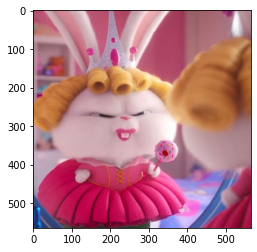

[('n06794110', 'street_sign', 0.9874286), ('n06874185', 'traffic_light', 0.0010841746), ('n04604644', 'worm_fence', 0.0004066213)]


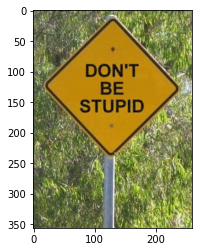

[('n04209133', 'shower_cap', 0.22776553), ('n07615774', 'ice_lolly', 0.060689818), ('n04270147', 'spatula', 0.007249022)]


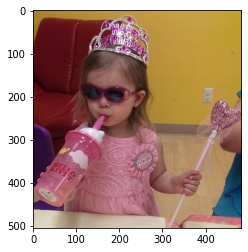

[('n04557648', 'water_bottle', 0.42260706), ('n04357314', 'sunscreen', 0.040060483), ('n03476991', 'hair_spray', 0.032439675)]


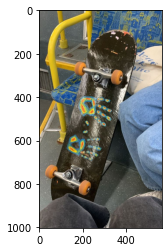

[('n04356056', 'sunglasses', 0.58262587), ('n04355933', 'sunglass', 0.089824535), ('n02892767', 'brassiere', 0.065072335)]


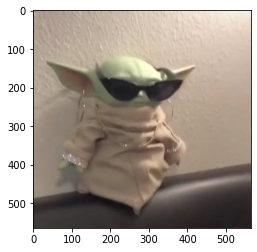

In [28]:
features = model.predict(images2)
predictions = decode_predictions(features, top=3)

for i in range(images2.shape[0]) :
    print(predictions[i])
    plt.imshow(image.load_img(files2[i]))
    plt.show()